In [2]:
import numpy as np

def read_file(file_name: str):
    results = []
    with open(file_name, 'r') as file:
        for line in file:
            line.strip()
            results.append(float(line))
    return results

def get_average(file_name):
    result_list = read_file(file_name)
    results = np.array(list(result_list))
    return sum(results)/len(results)


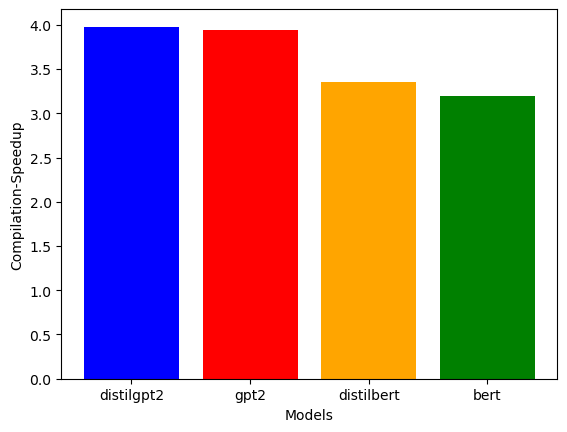

In [32]:
import matplotlib.pyplot as plt
average_distilgpt2_compiled = get_average("gpt2/distilgpt2-compiled.txt")
average_distilgpt2_uncompiled = get_average("gpt2/distilgpt2-uncompiled.txt")
average_gpt2_compiled = get_average("gpt2/gpt2-compiled.txt")
average_gpt2_uncompiled = get_average("gpt2/gpt2-uncompiled.txt")

average_bert_compiled = get_average("bert/bert-base-uncased-compiled.txt")
average_bert_uncompiled = get_average("bert/bert-base-uncased-uncompiled.txt")
average_distilbert_compiled = get_average("bert/distilbert-base-uncased-compiled.txt")
average_distilbert_uncompiled = get_average("bert/distilbert-base-uncased-uncompiled.txt")


speedup_distilgpt = average_distilgpt2_uncompiled / average_distilgpt2_compiled
speedup_gpt = average_gpt2_uncompiled / average_gpt2_compiled
speedup_distilbert = average_distilbert_uncompiled / average_distilbert_compiled
speedup_bert = average_bert_uncompiled / average_bert_compiled


# Plotting the bar chart
plt.bar("distilgpt2", speedup_distilgpt, color='blue')
plt.bar("gpt2", speedup_gpt, color="red")
plt.bar("distilbert", speedup_distilbert, color="orange")
plt.bar("bert", speedup_bert, color="green")


# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Compilation-Speedup')

# Display the bar chart
plt.show()

/var/folders/f1/qxtps1rx3cs85pw03xtp8ql00000gn/T/ipykernel_83769/356615921.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
/var/folders/f1/qxtps1rx3cs85pw03xtp8ql00000gn/T/ipykernel_83769/356615921.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


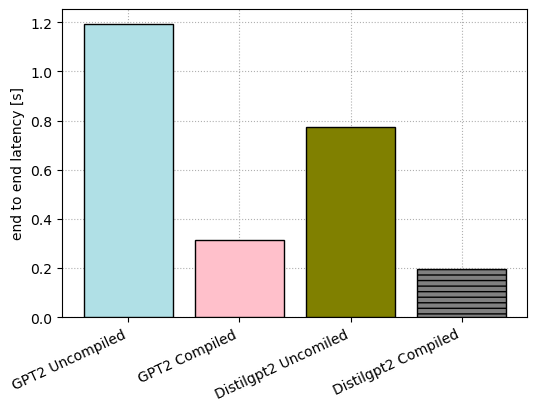

In [47]:
import matplotlib.pyplot as plt

average_distilgpt2_compiled = get_average("gpt2/distilgpt2-compiled.txt")
average_distilgpt2_uncompiled = get_average("gpt2/distilgpt2-uncompiled.txt")
average_gpt2_compiled = get_average("gpt2/gpt2-compiled.txt")
average_gpt2_uncompiled = get_average("gpt2/gpt2-uncompiled.txt")

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)

# Plotting the bar chart
ax.bar("GPT2 Uncompiled", average_gpt2_uncompiled, edgecolor='black', color="powderblue", zorder=3)
ax.bar("GPT2 Compiled", average_gpt2_compiled, edgecolor='black', color="pink", zorder=3)
ax.bar("Distilgpt2 Uncomiled", average_distilgpt2_uncompiled, edgecolor='black', color="olive", zorder=3)
ax.bar("Distilgpt2 Compiled", average_distilgpt2_compiled, edgecolor='black', color='grey', hatch="---", zorder=3)

ax.grid(linestyle="dotted", zorder=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
ax.set_ylabel('end to end latency [s]')

fig.show()
fig.savefig(fname="gpt2/gpt2-latency.pdf", dpi=500, bbox_inches="tight")

/var/folders/f1/qxtps1rx3cs85pw03xtp8ql00000gn/T/ipykernel_83769/3735334319.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
/var/folders/f1/qxtps1rx3cs85pw03xtp8ql00000gn/T/ipykernel_83769/3735334319.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


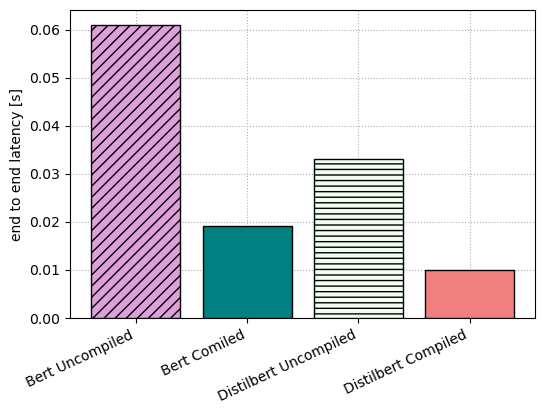

In [48]:
import matplotlib.pyplot as plt

average_bert_compiled = get_average("bert/bert-base-uncased-compiled.txt")
average_bert_uncompiled = get_average("bert/bert-base-uncased-uncompiled.txt")
average_distilbert_compiled = get_average("bert/distilbert-base-uncased-compiled.txt")
average_distilbert_uncompiled = get_average("bert/distilbert-base-uncased-uncompiled.txt")


fig, ax = plt.subplots()
fig.set_size_inches(6, 4)

# Plotting the bar chart
ax.bar("Bert Uncompiled", average_bert_uncompiled, edgecolor='black', color='plum', hatch="///", zorder=3)
ax.bar("Bert Comiled", average_bert_compiled, edgecolor='black', color="teal", zorder=3)
ax.bar("Distilbert Uncompiled", average_distilbert_uncompiled, edgecolor='black', color="honeydew", hatch="---", zorder=3)
ax.bar("Distilbert Compiled", average_distilbert_compiled, edgecolor='black', color="lightcoral", zorder=3)

ax.grid(linestyle="dotted", zorder=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
ax.set_ylabel('end to end latency [s]')

fig.show()
fig.savefig(fname="bert/bert-latency.pdf", dpi=500, bbox_inches="tight")

In [3]:
import csv
import matplotlib.pyplot as plt


def createPerfPlot(csv_file_path: str, csv_file_name: str, title: str):
    # Lists to store data
    x_values = []
    y_values_lists = []

    # Read data from CSV file
    with open(csv_file_path + csv_file_name, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Read the header to get column names

        x_column_index = header.index('Batch Size')  # Replace 'x_column_name' with the actual column name for x-axis
        y_column_indices = []
        for i in range(1, len(header)):
            y_column_indices.append(i) 

        for i in range(len(y_column_indices)):
            y_values_lists.append([])

        for row in reader:
            # Extract x-axis values
            x_values.append(float(row[x_column_index]))

            # Extract y-axis values
            for y_index in y_column_indices:
                y_values_lists[y_index - 1].append(float(row[y_index]))        

    colors = ["teal", "coral", "olive"]

    plt.figure(figsize=(6, 4))

    # Plot the data
    i = 0
    j = 0
    while i < len(y_values_lists):
        plt.plot(x_values, y_values_lists[i], label=header[i + 1], linestyle="-", color=colors[j])
        plt.plot(x_values, y_values_lists[i+1], label=header[i + 2], linestyle="dashed", color=colors[j])
        i += 2
        j += 1

    plt.ylabel('end-to-end latency [ms]')
    plt.xlabel('Batch Size')
    plt.title(title)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    file_name = title.lower().replace(" ", "-")
    save_path = f"{csv_file_path}{file_name}.pdf"
    plt.savefig(save_path, dpi=500, bbox_inches='tight')

    # Display the plot
    plt.show()


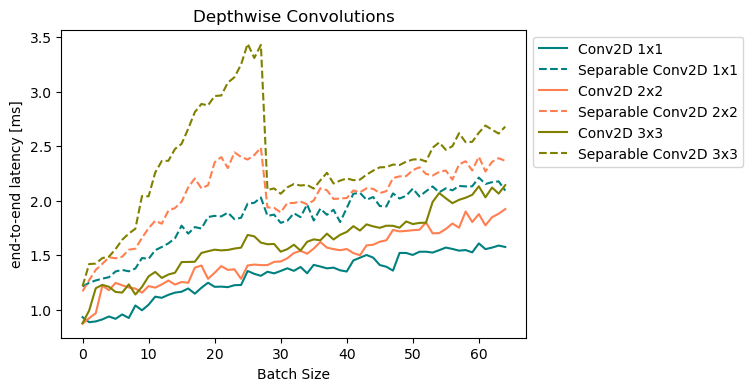

In [5]:
csv_file_path = "depthwise/"
csv_file_name = "conv2d.csv"
title = "Depthwise Convolutions"

createPerfPlot(csv_file_path=csv_file_path, csv_file_name=csv_file_name, title=title)